<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png?sfvrsn=764583a6_0' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Distributed Data Pipelines</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

Learning Objectives:
- Design PySpark Based Machine Learning
- Execute PySpark Syntax Correctly
- Evaluate and Select Final Model based on Metrics

You will be **graded on the use of PySpark**, so usage of **Pandas itself should be avoided as much as possible**, especially if a particular native method or function is already available in PySpark. **Penalties will be imposed in such cases.**

<a id="back"></a>

## Report Content Page
 
### [Code](#code)
- [Step 1: Problem Statement Formulation](#step1)
- [Step 2: Exploratory Data Analysis and Data Cleansing](#step2)
- [Step 3: Data Wrangling and Transformation](#step3)
- [Step 4: Machine Learning Modelling](#step4)
- [Step 5: Model Evaluation and Selection](#step5)
 
### [Report](#report) <a id="top"></a>
#### 1. [Introduction: Problem Understanding](#part1)
- [1.1 Load and Explore the Data](#part1.1)
- [1.2 Understand the Data](#part1.2)
- [1.3 Formulate a Value Based Problem Statement](#part1.3)

#### 2. [Exploratory Data Analysis and Data Cleansing](#part2)
- [2.1 Interesting Trends](#part2.1)
- [2.2 Anomalies](#part2.2)
- [2.3 Potential Errors](#part2.3)
- [2.4 Missing Value Treatment](#part2.4)
  - [2.4.1 Mean Imputation](#part2.4.1)
  - [2.4.2 Median Imputation](#part2.4.2)
  
#### 3. [Data Wrangling and Transformation](#part3)
- [3.1 Categorical Data](#part3.1)
  - [3.1.1 Categorical Data Encoding](#part3.1.1)
- [3.2 Numerical Data](#part3.2)
  - [3.2.1 Numerical Transformation](#part3.2.1)
  - [3.2.2 Scaling](#part3.2.2)
  
#### 4. [Machine Learning Modelling](#part4)
- [4.1 Show Count of Rows and Columns](#part4.1)
- [4.2 Sample of 10 Rows before Modelling](#part4.2)
- [4.3 Build the Predictive Model](#part4.3)

#### 5. [Model Evaluation and Selection](#part5)
- [5.1 Utilize Model Metrics for Evaluation](#part5.1)
- [5.2 Compare Models and Decide on Final Model](#part5.2)

#### 6. [Summary and Further Improvements](#part6)
- [6.1 Summarize your findings](#part6.1)
- [6.2 Explain the possible further improvements](#part6.2)

#### 7. [Video Link](#videolink)

## 1. Code <a id="code"></a>
[Back to top](#back)

In [1]:
# import the packages
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.types import IntegerType,BooleanType,DateType
from pyspark.sql.functions import col
from pyspark.sql.functions import sum, col, desc
import pyspark.sql.functions as func 
from pyspark.ml import Pipeline
from pyspark import SparkContext
from pyspark.sql import SQLContext 
from pyspark.ml.feature import OneHotEncoder, StringIndexer
spark=SparkSession.builder.appName('DDP_ASG_1_2022').getOrCreate()

### Step 1: Problem Statement Formulation <a id="step1"></a>
[Back to top](#back)

In [2]:
# load and explore data
data = spark.read.csv('./data/sg_flat_prices_mod.csv', header=True, inferSchema=True) 

In [3]:
data.show(5)

+----+-----+----------+---------+-----+-----------------+------------+--------------+--------------+-------------------+---------------+------------+
|year|month|      town|flat_type|block|      street_name|storey_range|floor_area_sqm|    flat_model|lease_commence_date|remaining_lease|resale_price|
+----+-----+----------+---------+-----+-----------------+------------+--------------+--------------+-------------------+---------------+------------+
|2017|    1|ANG MO KIO|   2 ROOM|  406|ANG MO KIO AVE 10|    10 TO 12|          44.0|      Improved|               1979|            736|    232000.0|
|2017|    1|ANG MO KIO|   3 ROOM|  108| ANG MO KIO AVE 4|    01 TO 03|          67.0|New Generation|               1978|            727|    250000.0|
|2017|    1|ANG MO KIO|   3 ROOM|  602| ANG MO KIO AVE 5|    01 TO 03|          67.0|New Generation|               1980|            749|    262000.0|
|2017|    1|ANG MO KIO|   3 ROOM|  465|ANG MO KIO AVE 10|    04 TO 06|          68.0|New Generation|

In [4]:
data.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- town: string (nullable = true)
 |-- flat_type: string (nullable = true)
 |-- block: string (nullable = true)
 |-- street_name: string (nullable = true)
 |-- storey_range: string (nullable = true)
 |-- floor_area_sqm: double (nullable = true)
 |-- flat_model: string (nullable = true)
 |-- lease_commence_date: integer (nullable = true)
 |-- remaining_lease: integer (nullable = true)
 |-- resale_price: double (nullable = true)



In [5]:
num_cols = ['year','month', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'resale_price']
data.select(num_cols).describe().show()

+-------+------------------+------------------+-----------------+-------------------+------------------+------------------+
|summary|              year|             month|   floor_area_sqm|lease_commence_date|   remaining_lease|      resale_price|
+-------+------------------+------------------+-----------------+-------------------+------------------+------------------+
|  count|             64247|             64247|            64197|              64247|             64247|             64247|
|   mean|2018.0262424704656| 6.779133656046197|97.77009984890256| 1993.6012420813422| 894.6413840334957|438943.70469516085|
| stddev|0.8146939469668695|3.2635673352950514|24.26994610142912| 12.465629502278013|149.62669792791093|153760.65294972394|
|    min|              2017|                 1|             31.0|               1966|               553|          150000.0|
|    max|              2019|                12|            249.0|               2016|              1160|         1205000.0|
+-------

In [6]:
# Get row count
rows = data.count()
print(f"DataFrame Rows count : {rows}")

DataFrame Rows count : 64247


### Step 2: Exploratory Data Analysis and Data Cleansing <a id="step2"></a>
[Back to top](#back)

#### 2.1 Data Exploration

#### 2.1.1 Dashboard 1: No. of Flats Sold & Resale Price Over Time

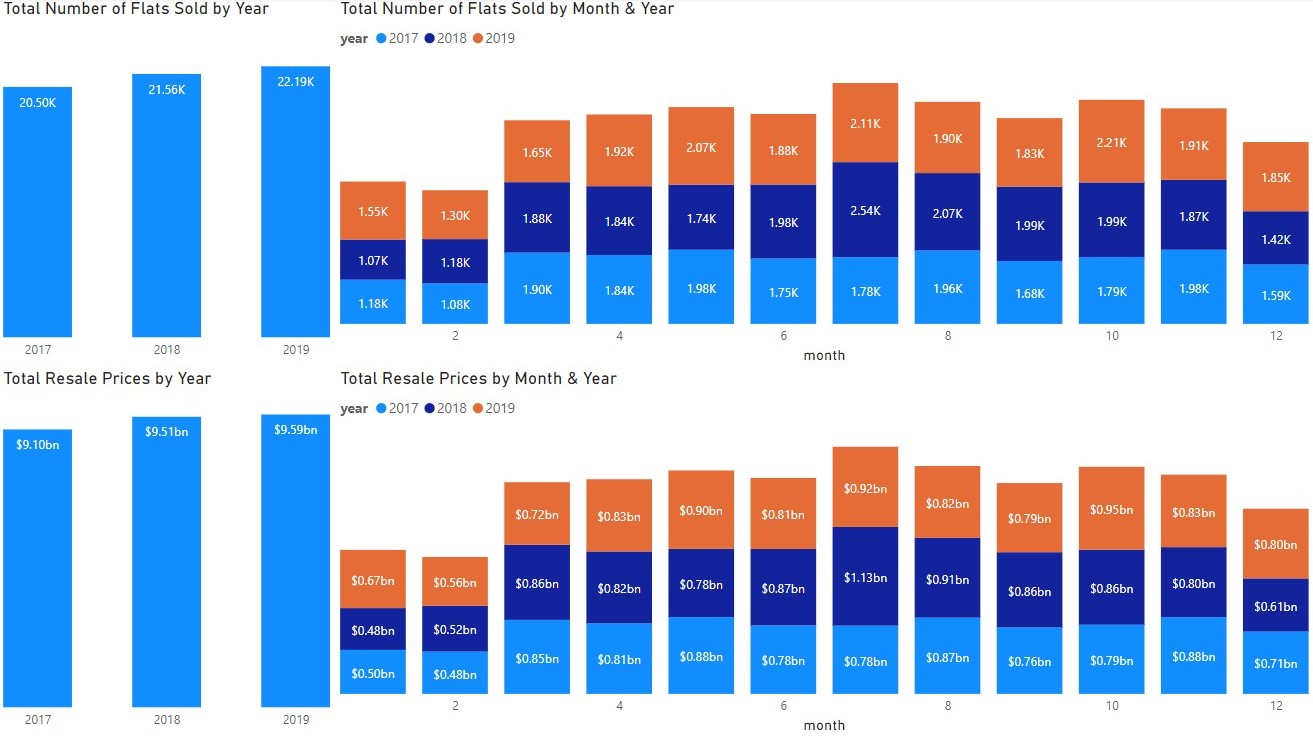

#### 2.1.2 Dashboard 2: No. of Flats Sold & Total Resale Prices by Variables

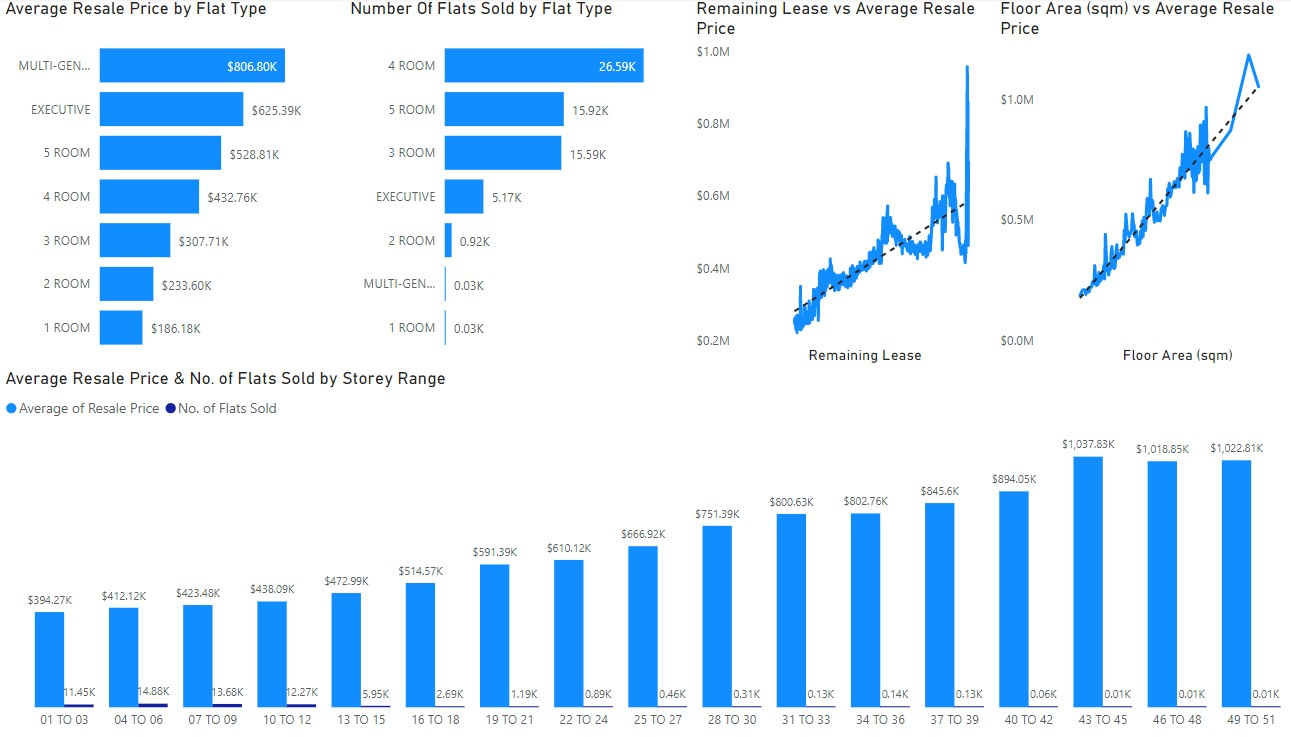

#### 2.1.3 Dashboard 3: Distribution of Numerical Variables 

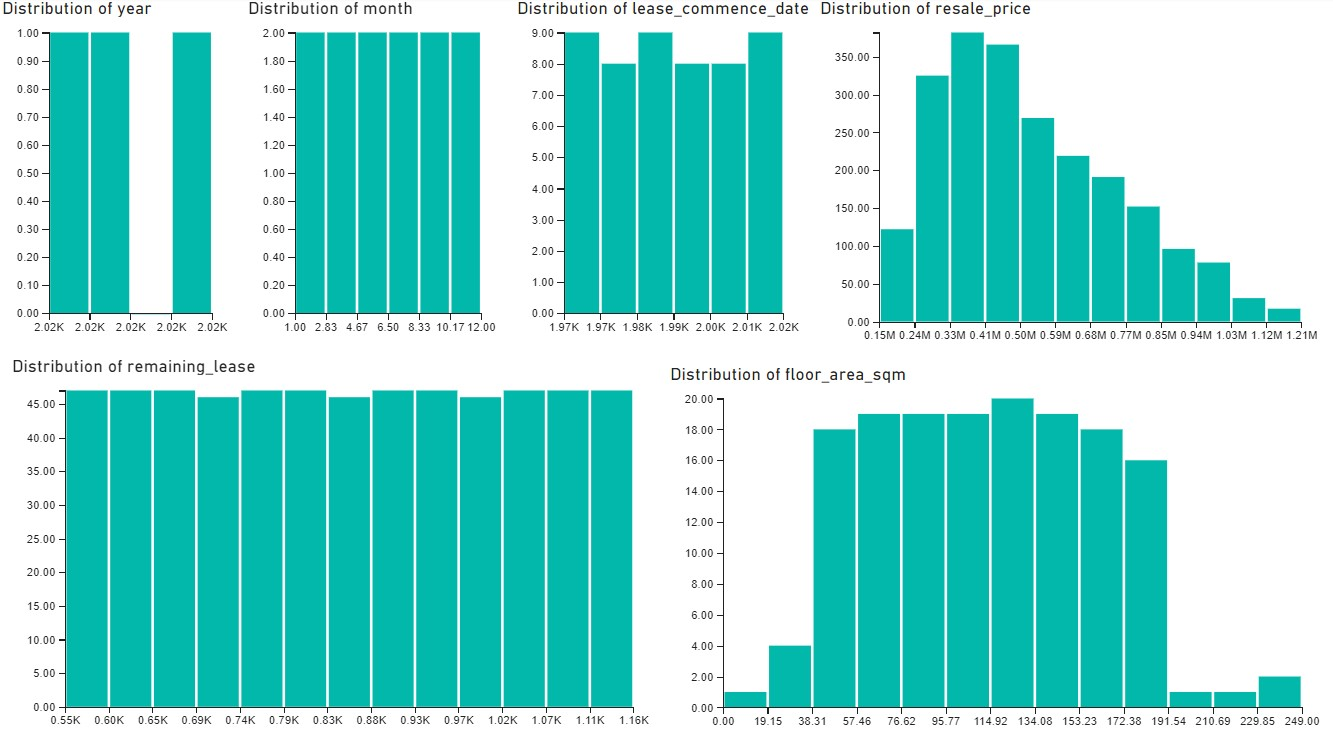

#### 2.1.4 More Data Exploration

#### Average resale price of different flat types

In [7]:
# average resale price of different flat types
data.groupBy('flat_type') \
  .agg(mean('resale_price').alias('resale_price')) \
  .withColumnRenamed('resale_price', 'average resale price') \
  .sort(desc('resale_price')) \
  .show()

+----------------+--------------------+
|       flat_type|average resale price|
+----------------+--------------------+
|MULTI-GENERATION|   806804.6060606061|
|       EXECUTIVE|   625390.6592435675|
|          5 ROOM|   528812.8562151295|
|          4 ROOM|   432760.1087740674|
|          3 ROOM|   307712.2837821541|
|          2 ROOM|  233600.68988030468|
|          1 ROOM|   186181.6551724138|
+----------------+--------------------+



Average or mean prices of the different types of flats. Multi-Generation flats have highest resale value at 806,804.61 while 1 Room flats have the lowest resale value at 186,181.66

####  Number of flats sold for different flat types

In [8]:
# number of flats sold for different flat types
data.groupBy('flat_type') \
  .agg(count('resale_price').alias('resale_price')) \
  .withColumnRenamed('resale_price', 'no. of flats sold') \
  .sort(desc('resale_price')) \
  .show()

+----------------+-----------------+
|       flat_type|no. of flats sold|
+----------------+-----------------+
|          4 ROOM|            26592|
|          5 ROOM|            15916|
|          3 ROOM|            15589|
|       EXECUTIVE|             5169|
|          2 ROOM|              919|
|MULTI-GENERATION|               33|
|          1 ROOM|               29|
+----------------+-----------------+



Number of flats sold for different types of HDB flats. 4 Room flats have the most number of flats sold at 26592 while 1 Room have the least number of flats sold at 29.

#### Number of flats sold for different flat models

In [9]:
# number of flats sold for different flat models
data.groupBy('flat_model') \
  .agg(count('resale_price').alias('resale_price')) \
  .withColumnRenamed('resale_price', 'no. of flats sold') \
  .sort(desc('resale_price')) \
  .show()

+--------------------+-----------------+
|          flat_model|no. of flats sold|
+--------------------+-----------------+
|             Model A|            20743|
|            Improved|            16071|
|      New Generation|             9068|
|   Premium Apartment|             6945|
|          Simplified|             2754|
|           Apartment|             2627|
|          Maisonette|             1909|
|            Standard|             1802|
|                DBSS|              936|
|            Model A2|              885|
|       Adjoined flat|              119|
|             Type S1|              117|
|  Model A-Maisonette|              110|
|             Type S2|               63|
|             Terrace|               38|
|    Multi Generation|               33|
| Improved-Maisonette|               13|
|  Premium Maisonette|                7|
|Premium Apartment...|                7|
+--------------------+-----------------+



The flat model that sold the most number of flats is the Model A at 20743.

#### Top 10 towns by highest average resale price

In [10]:
# Top 10 towns by highest average resale price
data.groupBy('town') \
  .agg(round(mean('resale_price'), 2).alias('resale_price')) \
  .sort(desc('resale_price')) \
  .show(10)

+---------------+------------+
|           town|resale_price|
+---------------+------------+
|    BUKIT TIMAH|   714816.97|
|         BISHAN|   644789.63|
|   CENTRAL AREA|   623428.02|
|    BUKIT MERAH|   564024.88|
|     QUEENSTOWN|   554835.85|
|  MARINE PARADE|   518115.92|
|KALLANG/WHAMPOA|   496043.73|
|      TOA PAYOH|   494166.75|
|      PASIR RIS|   492123.09|
|      SERANGOON|   490769.09|
+---------------+------------+
only showing top 10 rows



The town with the highest average resale value is Bukit Timah at 714,816.97 

The town with the lowest average resale value among the top 10 is Serangoon at 490,769.09. 

#### Number of flats that sold for more than $1million

In [11]:
# Number of flats that sold for more than $1million
data.filter("resale_price>=1000000").count()

181

In total, 181 HDB flats have sold for more than $1 million.

#### Number of flats sold by flat types that sold for more than $1million

In [12]:
# Number of Flats Sold by Flat Types that Sold for More than $1million
data.filter("resale_price>=1000000").groupBy('flat_type').count().sort(col('count').desc()).show()

+---------+-----+
|flat_type|count|
+---------+-----+
|   5 ROOM|  128|
|EXECUTIVE|   32|
|   4 ROOM|   19|
|   3 ROOM|    2|
+---------+-----+



The type of flats that sold for more than $1 million include 3-Room at 2, 4-Room at 19, 5-Room at32 and Executive flats at 128.

#### Number of Flats Sold by Year that Sold for More than $1million

In [13]:
# Number of Flats Sold by Year that Sold for More than $1million
data.filter("resale_price>=1000000").groupBy('year').count().show()

+----+-----+
|year|count|
+----+-----+
|2018|   71|
|2019|   64|
|2017|   46|
+----+-----+



Across the 3 years, 2017, 2018 and 2019, 46, 71 and 64 flats have been sold for more than $1 million respectively.

#### 2.2 Deal with Missing Values

##### Find columns with null values

In [14]:
# show count of nulls for each column
from pyspark.sql.functions import col, isnan, when, count
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+----+-----+----+---------+-----+-----------+------------+--------------+----------+-------------------+---------------+------------+
|year|month|town|flat_type|block|street_name|storey_range|floor_area_sqm|flat_model|lease_commence_date|remaining_lease|resale_price|
+----+-----+----+---------+-----+-----------+------------+--------------+----------+-------------------+---------------+------------+
|   0|    0|   0|        0|    0|          0|           0|            50|         0|                  0|              0|           0|
+----+-----+----+---------+-----+-----------+------------+--------------+----------+-------------------+---------------+------------+



Identified that column 'floor_area_sqm' has null values. It is the only column with null values.

##### Distribution of floor_area_sqm

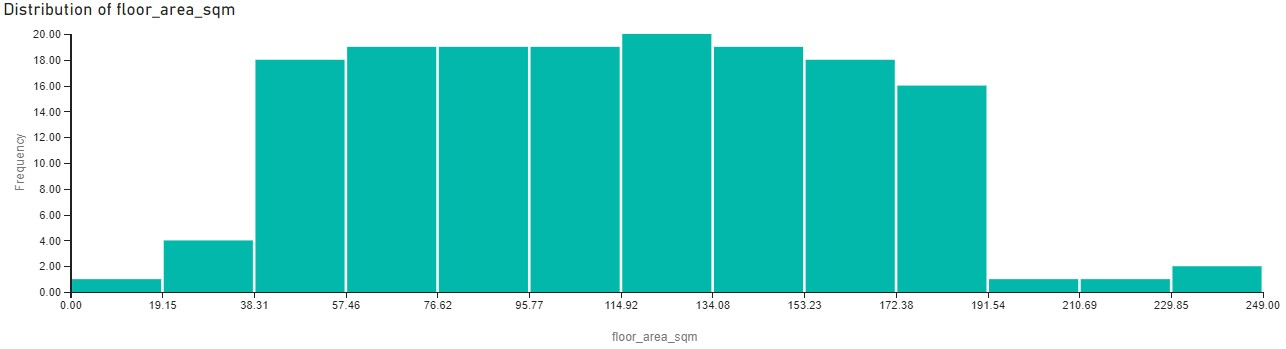

In [15]:
# consider NaN Treatment
# since it is normally distributed, can use mean, median, or mode. (decided based on model results)
# deal with NaN values using mean or median imputer

# create imputer
imputer = Imputer(
    inputCols=['floor_area_sqm'], 
    outputCols=["{}_imputed".format(c) for c in ['floor_area_sqm']]
    ).setStrategy("median")

# Add imputation cols to df
data = imputer.fit(data).transform(data)

In [16]:
data = data.drop('floor_area_sqm')

In [17]:
# show count of nulls for each column
from pyspark.sql.functions import col, isnan, when, count
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+----+-----+----+---------+-----+-----------+------------+----------+-------------------+---------------+------------+----------------------+
|year|month|town|flat_type|block|street_name|storey_range|flat_model|lease_commence_date|remaining_lease|resale_price|floor_area_sqm_imputed|
+----+-----+----+---------+-----+-----------+------------+----------+-------------------+---------------+------------+----------------------+
|   0|    0|   0|        0|    0|          0|           0|         0|                  0|              0|           0|                     0|
+----+-----+----+---------+-----+-----------+------------+----------+-------------------+---------------+------------+----------------------+



#### 2.3 Remove Redundant Columns

In [18]:
cols = ('block', 'street_name', 'lease_commence_date')
data = data.drop(*cols)

### Step 3: Data Wrangling and Transformation <a id="step3"></a>
[Back to top](#back)

In [19]:
# consider categorical and numerical variable treatment and transformations

In [20]:
data.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- town: string (nullable = true)
 |-- flat_type: string (nullable = true)
 |-- storey_range: string (nullable = true)
 |-- flat_model: string (nullable = true)
 |-- remaining_lease: integer (nullable = true)
 |-- resale_price: double (nullable = true)
 |-- floor_area_sqm_imputed: double (nullable = true)



#### 3.1 Ordinal Encoding + One Hot Encoding

###### flat_type column

In [21]:
# data.select("flat_type").distinct().collect()

In [22]:
# # encode flat_type column with numbers in string format
# # only works when data type is the same
# mapping= {
#         '1 ROOM': '1',
#         '2 ROOM': '2',
#         '3 ROOM': '3',
#         '4 ROOM': '4',
#         '5 ROOM': '5',
#         'EXECUTIVE': '6',
#         'MULTI-GENERATION': '7',
#     }

# data = data.replace(to_replace=mapping, subset=['flat_type']) 

# data.show()

In [23]:
# # convert data type from string to int for flat_type column
# # encoding with a map only works for columns with the same data type
# data = data.withColumn("flat_type",col("flat_type").cast(IntegerType()))

In [24]:
# data.printSchema()

###### storey_range column

In [25]:
# data.select("storey_range").distinct().show()

In [26]:
# # encode flat_type column with numbers in string format
# # only works when data type is the same
# mapping= {
#         '01 TO 03': '1',
#         '04 TO 06': '2',
#         '07 TO 09': '3',
#         '10 TO 12': '4',
#         '13 TO 15': '5',
#         '16 TO 18': '6',
#         '19 TO 21': '7',
#         '22 TO 24': '8',
#         '25 TO 27': '9',
#         '28 TO 30': '10',
#         '31 TO 33': '11',
#         '34 TO 36': '12',
#         '37 TO 39': '13',
#         '40 TO 42': '14',
#         '43 TO 45': '15',
#         '46 TO 48': '16',
#         '49 TO 51': '17',
#     }

# data = data.replace(to_replace=mapping, subset=['storey_range']) 

# data.show()

In [27]:
# data = data.withColumn("storey_range",col("storey_range").cast(IntegerType()))

In [28]:
# data.printSchema()

###### town and flat_model column

In [29]:
# strings_used = ["town", "flat_model"]  

# stage_string = [StringIndexer(inputCol= c, outputCol= c+"_string_encoded") for c in strings_used]
# stage_one_hot = [OneHotEncoder(inputCol= c+"_string_encoded", outputCol= c+ "_one_hot") for c in strings_used]

# ppl = Pipeline(stages= stage_string + stage_one_hot)
# pyspark_index_ohe = ppl.fit(data).transform(data)
# pyspark_index_ohe.show(5)

In [30]:
# cols = ("town_string_encoded", "flat_model_string_encoded") 
# pyspark_index_ohe = pyspark_index_ohe.drop(*cols)

In [31]:
# # drop original columns that were encoded
# cols = ["town", "flat_model"] 
# pyspark_index_ohe = pyspark_index_ohe.drop(*cols)

In [32]:
# pyspark_index_ohe = pyspark_index_ohe.select('year', 'month', 'remaining_lease', 'floor_area_sqm_imputed', 'town_one_hot', 
#                                              'flat_model_one_hot', 'resale_price') 
# pyspark_index_ohe.show()

#### 3.2 One Hot Encoding (all variables)

In [33]:
strings_used = ["town", "flat_type", "storey_range", "flat_model"]  

stage_string = [StringIndexer(inputCol= c, outputCol= c+"_string_encoded") for c in strings_used]
stage_one_hot = [OneHotEncoder(inputCol= c+"_string_encoded", outputCol= c+ "_one_hot") for c in strings_used]

ppl = Pipeline(stages= stage_string + stage_one_hot)
pyspark_index_ohe = ppl.fit(data).transform(data)
pyspark_index_ohe.show(5)

+----+-----+----------+---------+------------+--------------+---------------+------------+----------------------+-------------------+------------------------+---------------------------+-------------------------+--------------+-----------------+--------------------+------------------+
|year|month|      town|flat_type|storey_range|    flat_model|remaining_lease|resale_price|floor_area_sqm_imputed|town_string_encoded|flat_type_string_encoded|storey_range_string_encoded|flat_model_string_encoded|  town_one_hot|flat_type_one_hot|storey_range_one_hot|flat_model_one_hot|
+----+-----+----------+---------+------------+--------------+---------------+------------+----------------------+-------------------+------------------------+---------------------------+-------------------------+--------------+-----------------+--------------------+------------------+
|2017|    1|ANG MO KIO|   2 ROOM|    10 TO 12|      Improved|            736|    232000.0|                  44.0|                8.0|         

In [34]:
cols = ("town_string_encoded", "flat_type_string_encoded" , "storey_range_string_encoded", "flat_model_string_encoded") 
pyspark_index_ohe = pyspark_index_ohe.drop(*cols)

In [35]:
# drop original columns that were encoded
cols = ["town", "flat_type" , "storey_range", "flat_model"] 
pyspark_index_ohe = pyspark_index_ohe.drop(*cols)

In [36]:
pyspark_index_ohe = pyspark_index_ohe.select('year', 'month', 'remaining_lease', 'floor_area_sqm_imputed', 'town_one_hot', 
                                             'flat_type_one_hot' , 'storey_range_one_hot', 'flat_model_one_hot', 'resale_price') 
pyspark_index_ohe.show()

+----+-----+---------------+----------------------+--------------+-----------------+--------------------+------------------+------------+
|year|month|remaining_lease|floor_area_sqm_imputed|  town_one_hot|flat_type_one_hot|storey_range_one_hot|flat_model_one_hot|resale_price|
+----+-----+---------------+----------------------+--------------+-----------------+--------------------+------------------+------------+
|2017|    1|            736|                  44.0|(25,[8],[1.0])|    (6,[4],[1.0])|      (16,[2],[1.0])|    (18,[1],[1.0])|    232000.0|
|2017|    1|            727|                  67.0|(25,[8],[1.0])|    (6,[2],[1.0])|      (16,[3],[1.0])|    (18,[2],[1.0])|    250000.0|
|2017|    1|            749|                  67.0|(25,[8],[1.0])|    (6,[2],[1.0])|      (16,[3],[1.0])|    (18,[2],[1.0])|    262000.0|
|2017|    1|            745|                  68.0|(25,[8],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[2],[1.0])|    265000.0|
|2017|    1|            749|      

### Step 4: Machine Learning Modelling <a id="step4"></a>
[Back to top](#back)

#### 4.1 Sample 10 Rows

In [37]:
# show a sample of 10 rows before heading into Machine Learning Modelling
pyspark_index_ohe.show(10)

+----+-----+---------------+----------------------+--------------+-----------------+--------------------+------------------+------------+
|year|month|remaining_lease|floor_area_sqm_imputed|  town_one_hot|flat_type_one_hot|storey_range_one_hot|flat_model_one_hot|resale_price|
+----+-----+---------------+----------------------+--------------+-----------------+--------------------+------------------+------------+
|2017|    1|            736|                  44.0|(25,[8],[1.0])|    (6,[4],[1.0])|      (16,[2],[1.0])|    (18,[1],[1.0])|    232000.0|
|2017|    1|            727|                  67.0|(25,[8],[1.0])|    (6,[2],[1.0])|      (16,[3],[1.0])|    (18,[2],[1.0])|    250000.0|
|2017|    1|            749|                  67.0|(25,[8],[1.0])|    (6,[2],[1.0])|      (16,[3],[1.0])|    (18,[2],[1.0])|    262000.0|
|2017|    1|            745|                  68.0|(25,[8],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[2],[1.0])|    265000.0|
|2017|    1|            749|      

#### 4.2 Number of Rows and Columns

In [38]:
# generate the train/test split
(train, test) = pyspark_index_ohe.randomSplit([0.8, 0.2], seed=42)

In [39]:
# number of rows and columns before train test split
pyspark_index_ohe.count(), len(pyspark_index_ohe.columns)

(64247, 9)

In [40]:
# number of rows and columns after train test split
train.count(), len(train.columns)

(51406, 9)

In [41]:
# number of rows and columns after train test split
test.count(), len(test.columns)

(12841, 9)

#### 4.3 Consolidating X Columns

In [42]:
featureassembler=VectorAssembler(inputCols=pyspark_index_ohe.columns[:-1],outputCol="Xcols")

In [43]:
train_vectored = featureassembler.transform(train)

In [44]:
train_vectored.show(5)

+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+
|year|month|remaining_lease|floor_area_sqm_imputed|   town_one_hot|flat_type_one_hot|storey_range_one_hot|flat_model_one_hot|resale_price|               Xcols|
+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+
|2017|    1|            585|                  67.0|(25,[19],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[1],[1.0])|    250000.0|(69,[0,1,2,3,23,3...|
|2017|    1|            588|                  59.0|(25,[18],[1.0])|    (6,[2],[1.0])|      (16,[3],[1.0])|    (18,[7],[1.0])|    263000.0|(69,[0,1,2,3,22,3...|
|2017|    1|            588|                  60.0|(25,[17],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[7],[1.0])|    320000.0|(69,[0,1,2,3,21,3...|
|2017|    1|            588|            

In [45]:
test_vectored = featureassembler.transform(test)

In [46]:
test_vectored.show(5)

+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+
|year|month|remaining_lease|floor_area_sqm_imputed|   town_one_hot|flat_type_one_hot|storey_range_one_hot|flat_model_one_hot|resale_price|               Xcols|
+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+
|2017|    1|            588|                  60.0|(25,[17],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[7],[1.0])|    307000.0|(69,[0,1,2,3,21,3...|
|2017|    1|            588|                  60.0|(25,[18],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[7],[1.0])|    235000.0|(69,[0,1,2,3,22,3...|
|2017|    1|            588|                  60.0|(25,[18],[1.0])|    (6,[2],[1.0])|      (16,[3],[1.0])|    (18,[7],[1.0])|    262000.0|(69,[0,1,2,3,22,3...|
|2017|    1|            605|            

#### 4.4 Standard Scaling

In [47]:
sScaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [48]:
train_sscaled = sScaler.fit(train_vectored).transform(train_vectored)
train_sscaled.show()

+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+--------------------+
|year|month|remaining_lease|floor_area_sqm_imputed|   town_one_hot|flat_type_one_hot|storey_range_one_hot|flat_model_one_hot|resale_price|               Xcols|       Xcols_sscaled|
+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+--------------------+
|2017|    1|            585|                  67.0|(25,[19],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[1],[1.0])|    250000.0|(69,[0,1,2,3,23,3...|[-1.2578814265840...|
|2017|    1|            588|                  59.0|(25,[18],[1.0])|    (6,[2],[1.0])|      (16,[3],[1.0])|    (18,[7],[1.0])|    263000.0|(69,[0,1,2,3,22,3...|[-1.2578814265840...|
|2017|    1|            588|                  60.0|(25,[17],[1.0])|    (6,[2],[1.0])|      (16,

In [49]:
test_sscaled = sScaler.fit(test_vectored).transform(test_vectored)
test_sscaled.show()

+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+--------------------+
|year|month|remaining_lease|floor_area_sqm_imputed|   town_one_hot|flat_type_one_hot|storey_range_one_hot|flat_model_one_hot|resale_price|               Xcols|       Xcols_sscaled|
+----+-----+---------------+----------------------+---------------+-----------------+--------------------+------------------+------------+--------------------+--------------------+
|2017|    1|            588|                  60.0|(25,[17],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[7],[1.0])|    307000.0|(69,[0,1,2,3,21,3...|[-1.2668088746839...|
|2017|    1|            588|                  60.0|(25,[18],[1.0])|    (6,[2],[1.0])|      (16,[0],[1.0])|    (18,[7],[1.0])|    235000.0|(69,[0,1,2,3,22,3...|[-1.2668088746839...|
|2017|    1|            588|                  60.0|(25,[18],[1.0])|    (6,[2],[1.0])|      (16,

In [50]:
train_data = train_sscaled.select("Xcols_sscaled","resale_price")
train_data.show(5)

+--------------------+------------+
|       Xcols_sscaled|resale_price|
+--------------------+------------+
|[-1.2578814265840...|    250000.0|
|[-1.2578814265840...|    263000.0|
|[-1.2578814265840...|    320000.0|
|[-1.2578814265840...|    290000.0|
|[-1.2578814265840...|    334888.0|
+--------------------+------------+
only showing top 5 rows



In [51]:
test_data = test_sscaled.select("Xcols_sscaled","resale_price")
test_data.show(5)

+--------------------+------------+
|       Xcols_sscaled|resale_price|
+--------------------+------------+
|[-1.2668088746839...|    307000.0|
|[-1.2668088746839...|    235000.0|
|[-1.2668088746839...|    262000.0|
|[-1.2668088746839...|    256000.0|
|[-1.2668088746839...|    312000.0|
+--------------------+------------+
only showing top 5 rows



#### 4.5 Modelling

In [52]:
regressor=LinearRegression(featuresCol="Xcols_sscaled", labelCol='resale_price')
regressor=regressor.fit(train_data)

In [53]:
type(regressor)

pyspark.ml.regression.LinearRegressionModel

In [54]:
# Coefficients
regressor.coefficients

DenseVector([-487.1297, 309.4716, 57087.2447, 88048.0075, -98702.2511, -91915.5685, -89364.3833, -79199.301, -59619.4017, -78353.8232, -47240.8311, -60014.2309, -43095.7186, -75506.7738, -18801.9771, -55097.9306, -62805.0454, -28699.225, -25176.7332, -52009.1494, -63801.0291, -13785.8515, -24456.2619, -40847.9945, -24022.1694, -29165.5149, -14078.0183, -9147.6766, -3724.1893, 37631.6535, 38906.9457, 25608.7698, 26311.604, 4110.6222, 2693.0062, -82959.0418, -75331.0661, -68929.7269, -81561.2909, -48108.7623, -29675.7837, -15805.8519, -13295.4592, -7637.8689, -4847.3243, -2904.9771, -1921.6646, -3497.8383, -732.2494, -191.3174, -115.3852, -9905.7493, -9146.0042, -1378.8562, -4477.0059, -1278.9479, 3099.7288, 8564.293, -1270.8872, 14229.2812, -2554.6857, 1934.0397, 6829.4682, 3729.5092, 6767.1532, 7965.3413, 2041.7755, 2005.1872, 1956.0885])

In [55]:
# Intercept
regressor.intercept

439320.1472938982

In [56]:
# first row values of Xcols_sscaled
train_data.take(1)

[Row(Xcols_sscaled=DenseVector([-1.2579, -1.768, -2.07, -1.2674, -0.2904, -0.2902, -0.29, -0.2685, -0.2603, -0.2574, -0.2353, -0.2215, -0.2172, -0.2067, -0.2043, -0.198, -0.1953, -0.1892, -0.1759, -0.1728, -0.1681, -0.1652, -0.1554, 6.4988, -0.1485, -0.1459, -0.1416, -0.0951, -0.077, -0.8397, -0.5731, 1.7664, -0.2972, -0.1209, -0.0216, 1.8243, -0.5185, -0.4861, -0.4655, -0.3203, -0.2093, -0.1378, -0.12, -0.0847, -0.0721, -0.0465, -0.0459, -0.0463, -0.0315, -0.0117, -0.0099, -0.6911, 1.7315, -0.4037, -0.3472, -0.2112, -0.2079, -0.1756, -0.171, -0.1232, -0.1178, -0.043, -0.0426, -0.039, -0.0336, -0.0253, -0.0216, -0.0132, -0.0117]), resale_price=250000.0)]

### Step 5: Model Evaluation and Selection <a id="step5"></a>
[Back to top](#back)

In [57]:
train_pred_results=regressor.evaluate(train_data)

In [58]:
test_pred_results=regressor.evaluate(test_data)

In [59]:
test_pred_results.predictions.show()

+--------------------+------------+------------------+
|       Xcols_sscaled|resale_price|        prediction|
+--------------------+------------+------------------+
|[-1.2668088746839...|    307000.0| 339496.0358045411|
|[-1.2668088746839...|    235000.0| 273105.2589969176|
|[-1.2668088746839...|    262000.0|256226.70149395562|
|[-1.2668088746839...|    256000.0| 294167.3006081154|
|[-1.2668088746839...|    312000.0|362023.50060117594|
|[-1.2668088746839...|    330000.0| 394647.2932188114|
|[-1.2668088746839...|    300000.0| 321710.1385277013|
|[-1.2668088746839...|    355000.0| 370970.4814461828|
|[-1.2668088746839...|    218000.0|244110.33098080044|
|[-1.2668088746839...|    230000.0|244110.33098080044|
|[-1.2668088746839...|    300000.0|306032.99827408267|
|[-1.2668088746839...|    365000.0|360540.74010233907|
|[-1.2668088746839...|    240000.0|103220.62351254612|
|[-1.2668088746839...|    260000.0| 296576.4056039688|
|[-1.2668088746839...|    400000.0| 387415.4032624579|
|[-1.26680

In [60]:
train_pred_results.meanAbsoluteError, train_pred_results.meanSquaredError, train_pred_results.r2

(43448.88780702004, 3189674032.059759, 0.8660163026676283)

In [61]:
test_pred_results.meanAbsoluteError, test_pred_results.meanSquaredError, test_pred_results.r2

(43965.586525513565, 3214888051.9794936, 0.8601051131200821)

In [62]:
pyspark_two_rows = test_data.limit(2)
pyspark_two_rows.show()

+--------------------+------------+
|       Xcols_sscaled|resale_price|
+--------------------+------------+
|[-1.2668088746839...|    307000.0|
|[-1.2668088746839...|    235000.0|
+--------------------+------------+



In [63]:
regressor.evaluate(pyspark_two_rows).predictions.show()

+--------------------+------------+-----------------+
|       Xcols_sscaled|resale_price|       prediction|
+--------------------+------------+-----------------+
|[-1.2668088746839...|    307000.0|339496.0358045411|
|[-1.2668088746839...|    235000.0|273105.2589969176|
+--------------------+------------+-----------------+



### Step 6: Report <a id="report"></a>
[Back to top](#back)

#### 1. Problem Statement Formulation <a id="part1"></a>
[Back to top](#top)

#### 1.1 Load and Explore the Data <a id="part1.1"></a>
[Back to top](#top)

##### Load Data

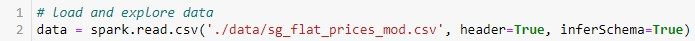

For the loading of data, spark.read.csv() is used.

#### 1.2 Understand the Data <a id="part1.2"></a>
[Back to top](#top)

##### Overview of Data

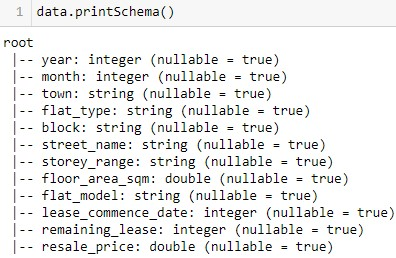

There are a total of 12 columns, with resale_price being the target variable. 6 columns are numerical and 6 are categorical.

##### More In-Depth View of Numerical Columns

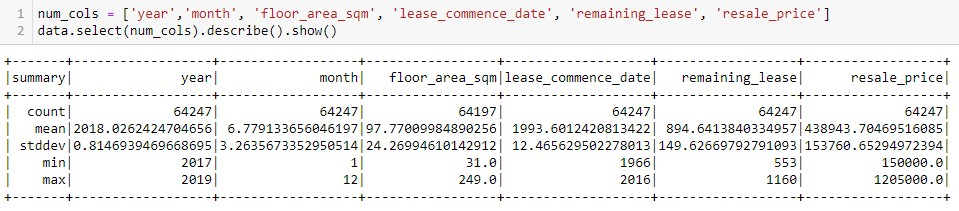

This dataset covers HDB transactions from 2017 to 2019. 

The smallest flat and largest flat sold is 31 square meter and 249 square meter respectively. The oldest flat sold was built in 1966 and the youngest flat sold was built in 2016. The longest and shortest remaining lease of a sold flat is 1160 and 553 years respectively. The cheapest and most expensive flat sold is 150,000 and 1.205 million dollars respectively.

#### 1.3 Formulate a Value Based Problem Statement <a id="part1.3"></a>
[Back to top](#top)

80% of Singapore’s residents live in HDB flats, which were developed by Singapore's government in 1960 to meet the city's housing needs. Due to the scarcity of land, HDB flats are built as apartments in high-rise buildings and come with a 99-year lease. Once completed, the lease commences, with the land eventually reverting to the government. 

HDB flats can be sold after 5 years of occupancy. Hence, there is a resale market to feed the growing demand and aspiration of homeowners. A young adult looking to own an HDB flat will need to understand the prices behind HDB resale flats.

In the past 2 years, prices for HDB flats have skyrocketed. Hence, for a new homeowner, the entry price is very important. A machine learning model is built to predict the price of an HDB flat in this assignment. This report covers the process of building a machine learning model, including data exploration, data wrangling, and modelling.

#### 2. Exploratory Data Analysis and Data Cleansing <a id="part2"></a>
[Back to top](#top)

#### Dashboard 1: No. of Flats Sold & Resale Price Over Time

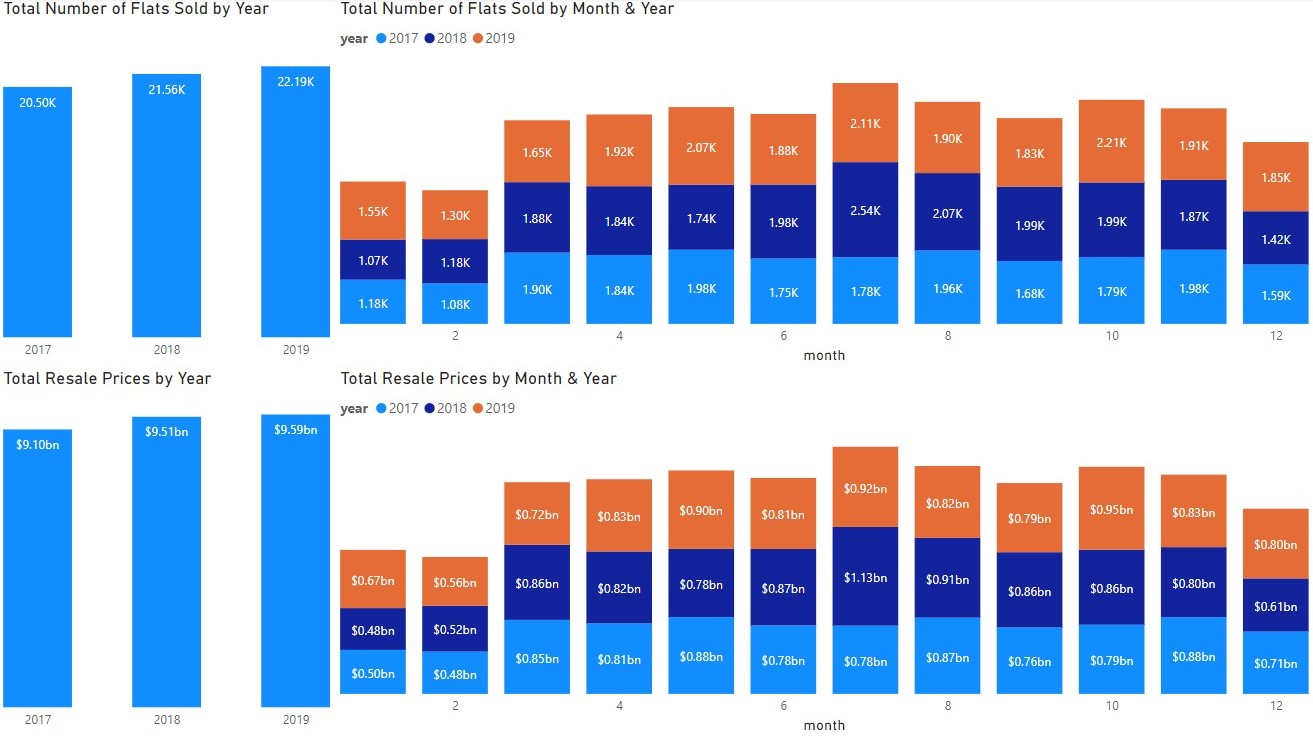

#### Dashboard 2: No. of Flats Sold & Total Resale Prices by Variables

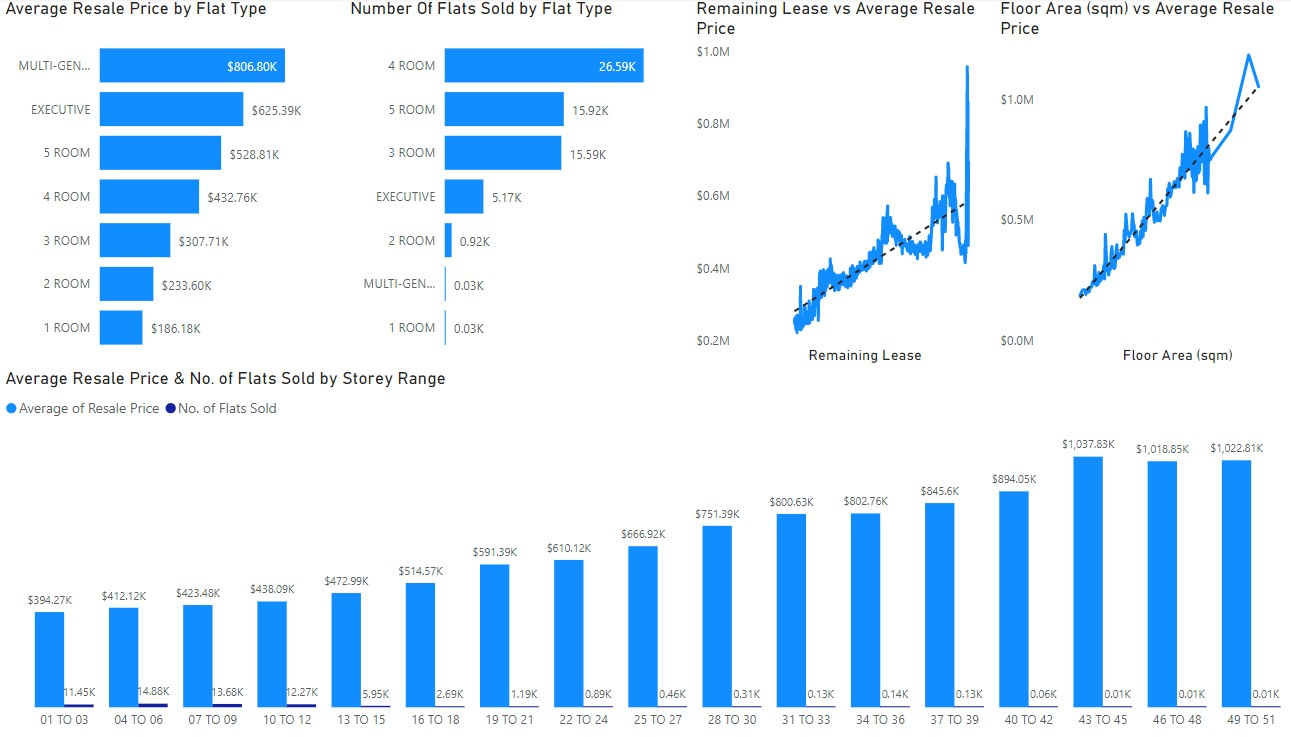

#### Dashboard 3: Distribution of Numerical Variables 

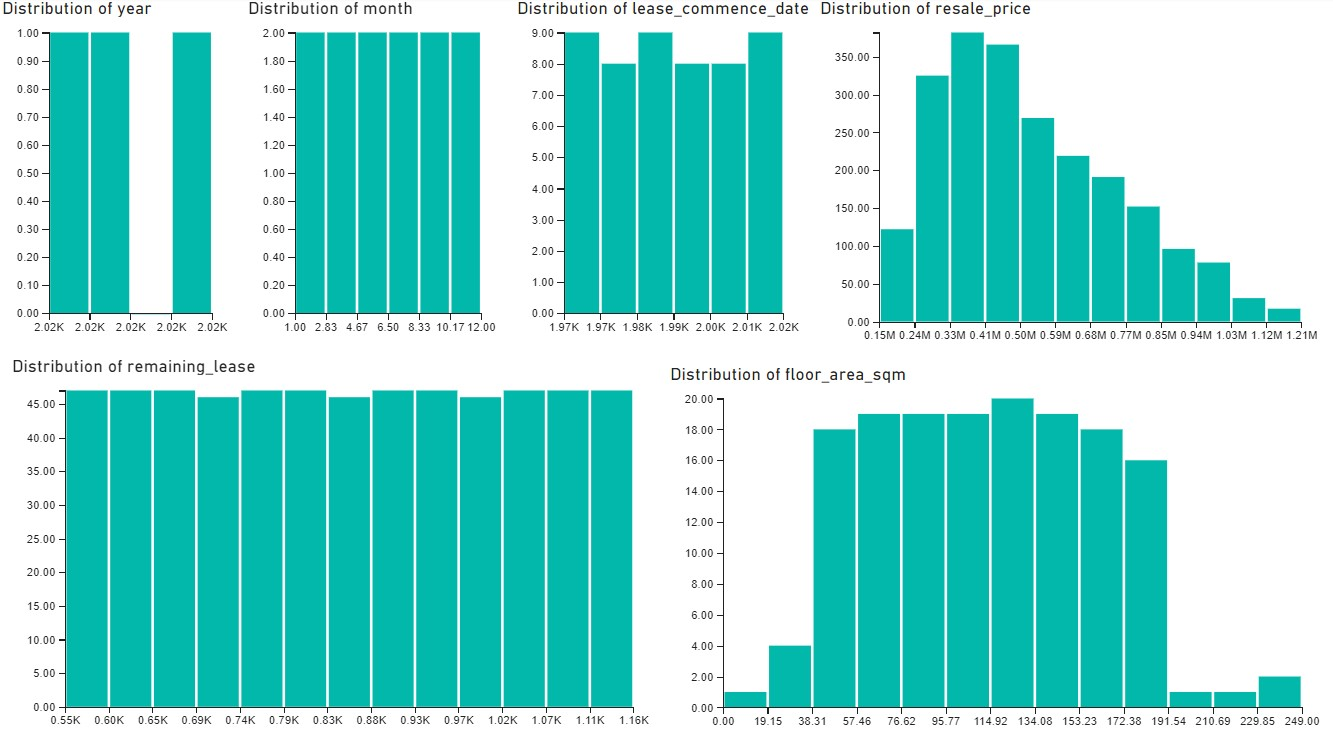

#### 2.1 Interesting Trends <a id="part2.1"></a>
[Back to top](#top)

For Dashboard 1, there are significantly less flats sold in January and Feburary compared to the other months for all years.

For Dashboard 2, the flat type that is most popular is the 4 room flat. It is unexpected as 3 room flats receive the most grants from the government.

#### 2.2 Anomalies <a id="part2.2"></a>
[Back to top](#top)

The only anomaly is found in dashboard 2. The average resale price for stories 43-35 is higher than stories 46-48 and 49-51. This is abnormal as usually the higher the storey, the higher the average resale price.

#### 2.3 Potential Errors <a id="part2.3"></a>
[Back to top](#top)

There are no potential errors found.

***Note: More Data Exploration in Section 2.1.4 of Code

#### 2.4 Missing Value Treatment <a id="part2.4"></a>
[Back to top](#top)

##### Identify Column with Missing Values

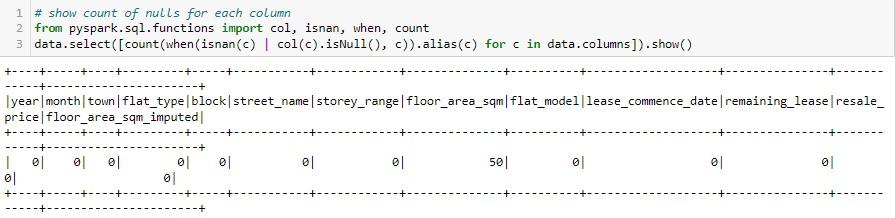

##### Distribution of  floor_area_sqm variable

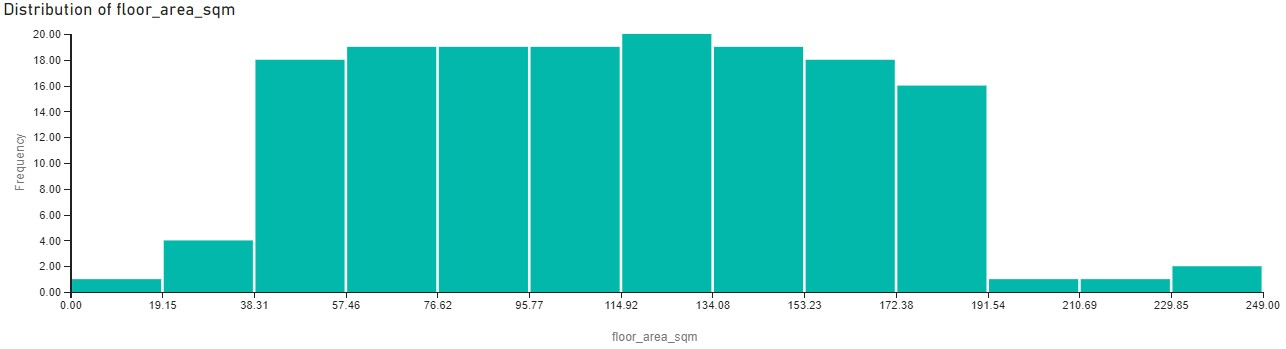

#### 2.4.1 Mean Imputation <a id="part2.4.1"></a>
[Back to top](#top)

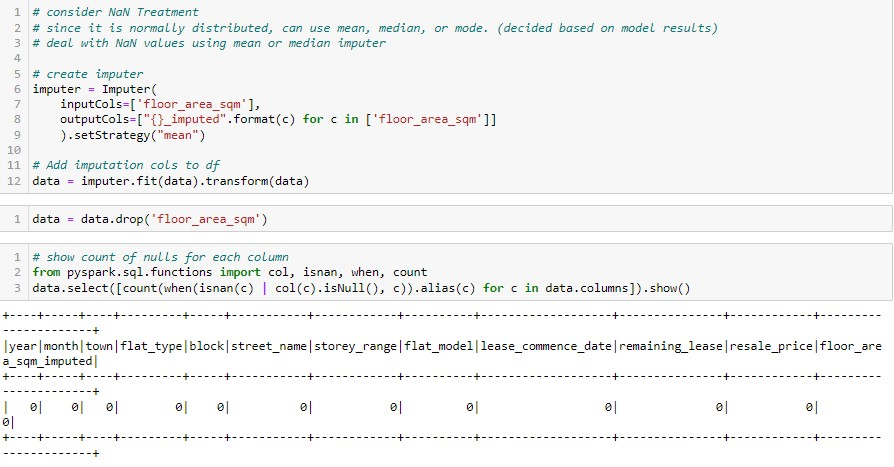

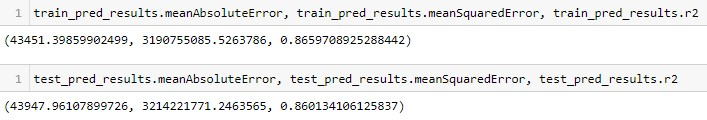

#### 2.4.2 Median Imputation <a id="part2.4.2"></a>
[Back to top](#top)

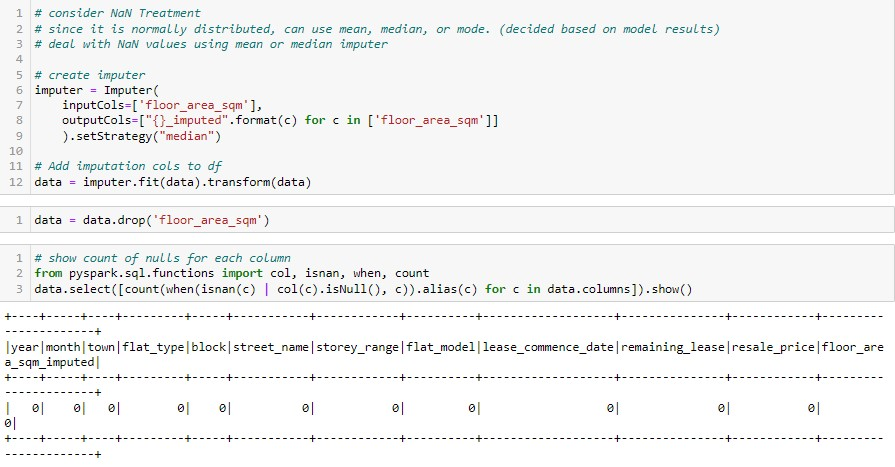

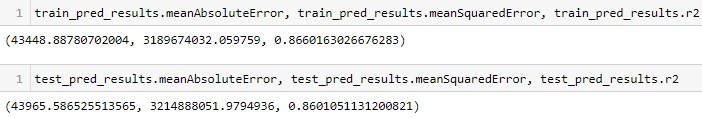

The only column that has missing values is floor_area_sqm which contains 50 missing values.

The histogram is plotted to analyse the distribution of data for this column. From the histogram, it is observed that the data is relatively normally distributed. This means that 3 methods of dealing with missing values can be considered. They are mean, median and mode imputation.

In this case, only mean and median imputation is considered as floor_area_square is a numerical column. Mode imputation is normally considered for categorical variables. Both mean and median were carried out and the result when median imputation is carried out is better than the result when mean imputation is carried out. Both train and test results improved slightly. Hence, median imputation is used.

#### 3. Data Wrangling and Transformation <a id="part3"></a>
[Back to top](#top)

#### 3.1 Categorical Data <a id="part3.1"></a>
[Back to top](#top)

#### 3.1.1 Categorical Data Encoding <a id="part3.1.1"></a>
[Back to top](#top)

##### One Hot Encoding (all variables)

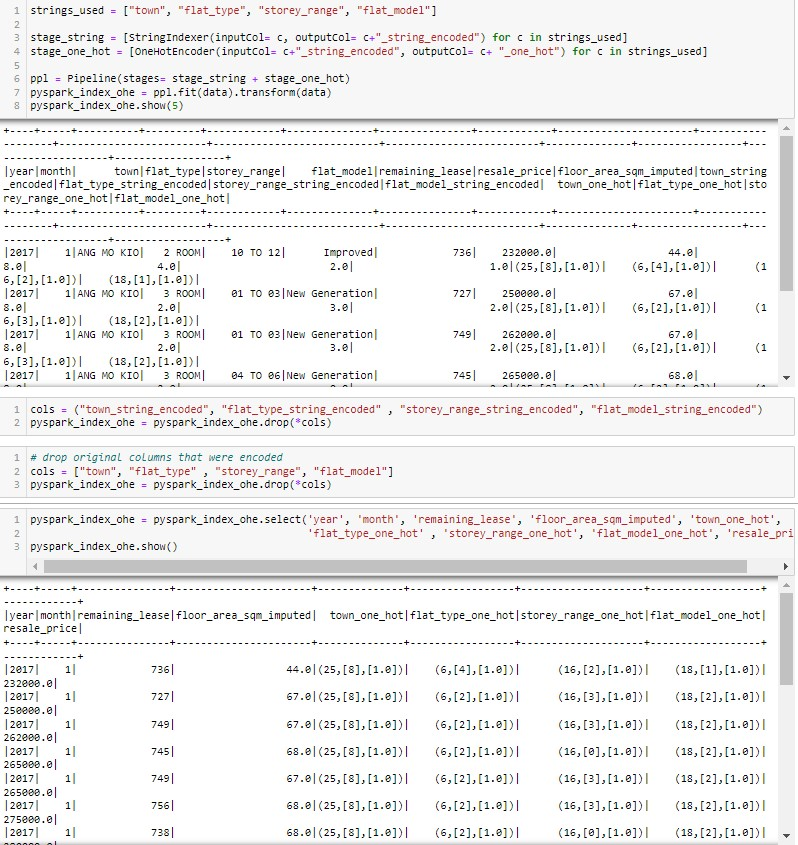

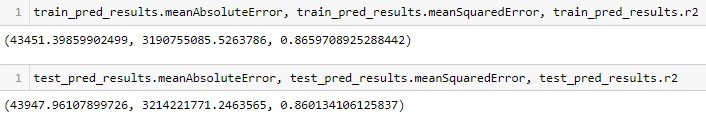

##### Ordinal Encoding + One Hot Encoding

###### Ordinal Encode flat_type variable

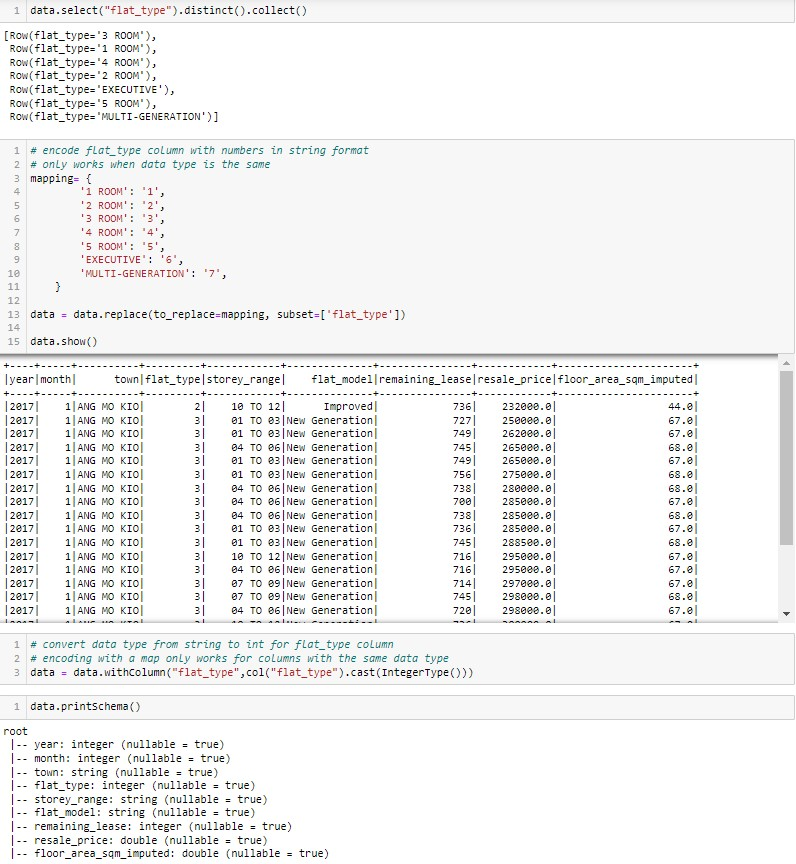

###### Ordinal Encode storey_range variable

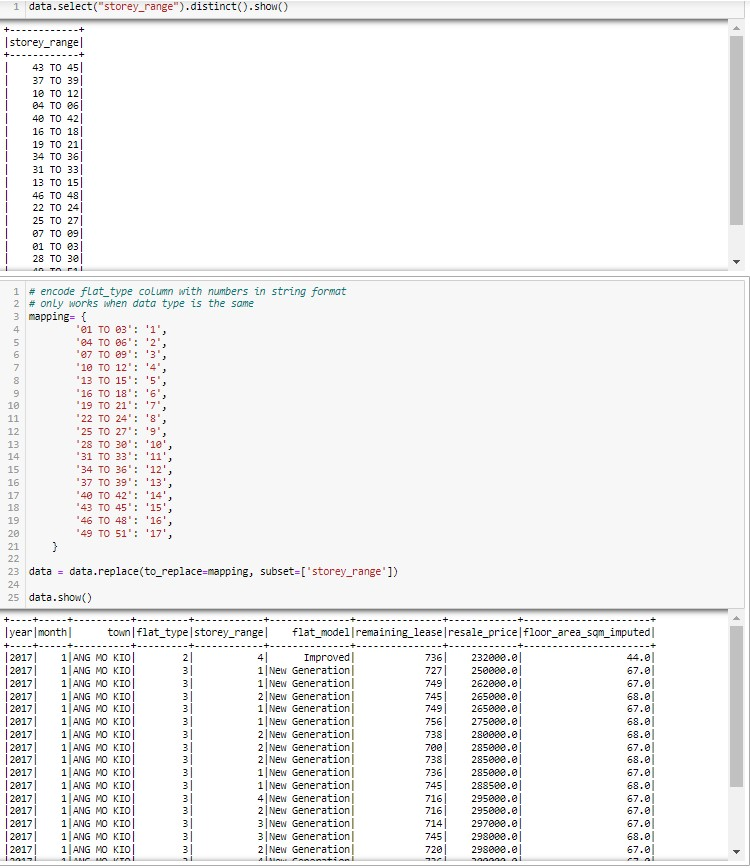

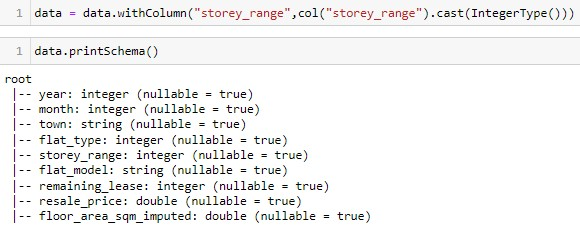

###### One Hot Encode (town and flat_model variables)

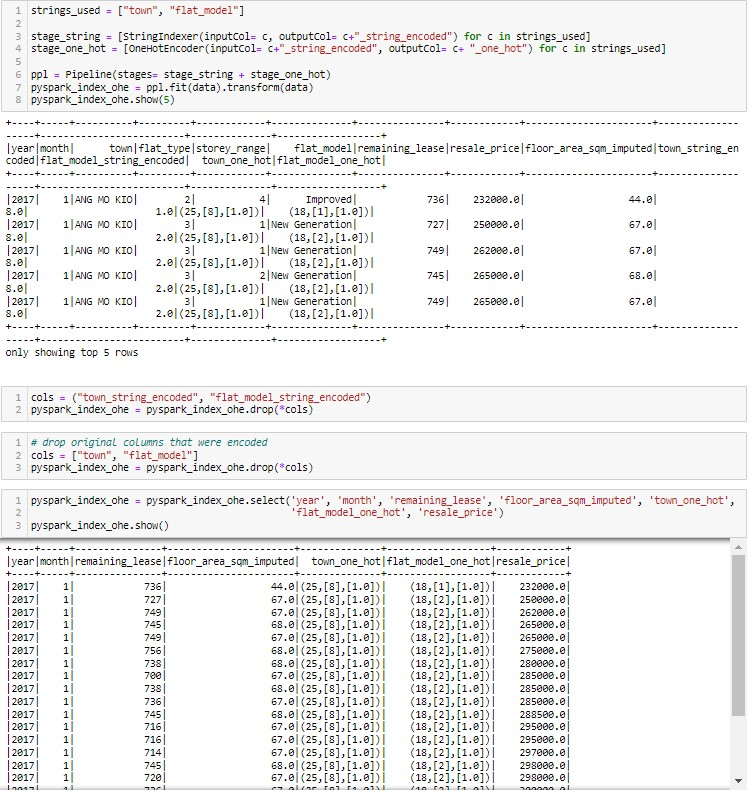

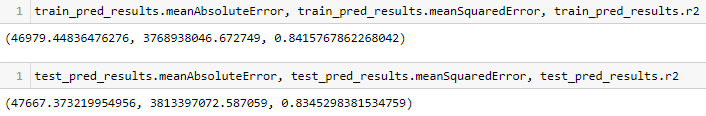

2 categorical variable encoding methods were attempted. First, all categorical variables were encoded using one hot encoding. Second, ordinal and one hot encoding were attempted.

The first method was mainly trial and error. Based on personal experience, it usually produces the best results.

The second method used ordinal encoding to encode the flat_type and storey_range variables, as both had a logical order. For example, flat_type, 1, 2, 3-bedroom flats, encoded with 1, 2,3 respectively. Ordinal encoding was not done on the other 2 variables as their values cannot be ranked. By doing so, incorrect assumptions would be made by the model since the model perceives higher value as more important. For example, when Queenstown is encoded with a higher number than Bishan, Queenstown has a higher significance than Bishan. This is a wrong assumption that may cause the model's performance to worsen.

Since one hot encoding of all variables produced the best result, it was used.

#### 3.2 Numerical Data <a id="part3.2"></a>
[Back to top](#top)

#### 3.2.1 Numerical Transformation <a id="part3.2.1"></a>
[Back to top](#top)

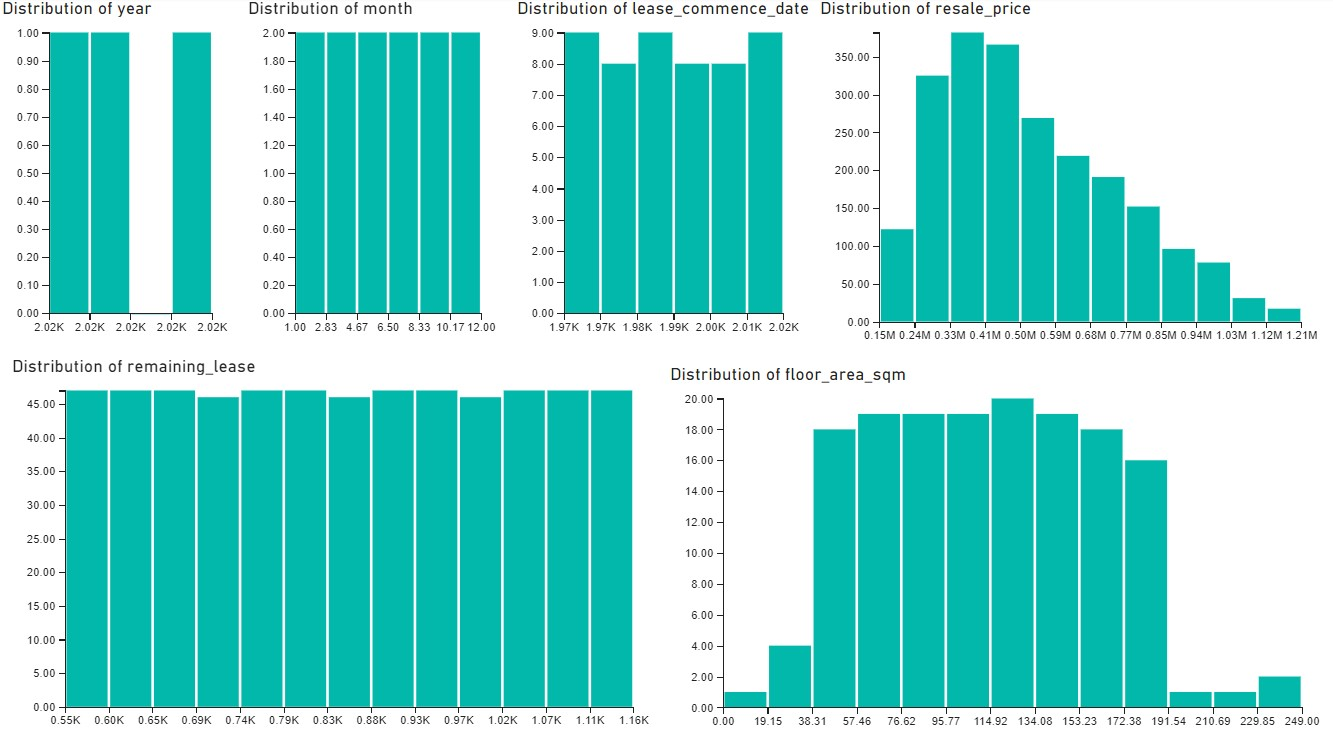

Aside from the target variable, no other variable had a skewed distribution. Performing numerical transformation on the target variable would be cherry picking convenient data. Hence, numerical transformation was not conducted.

#### 3.2.2 Scaling <a id="part3.2.2"></a>
[Back to top](#top)

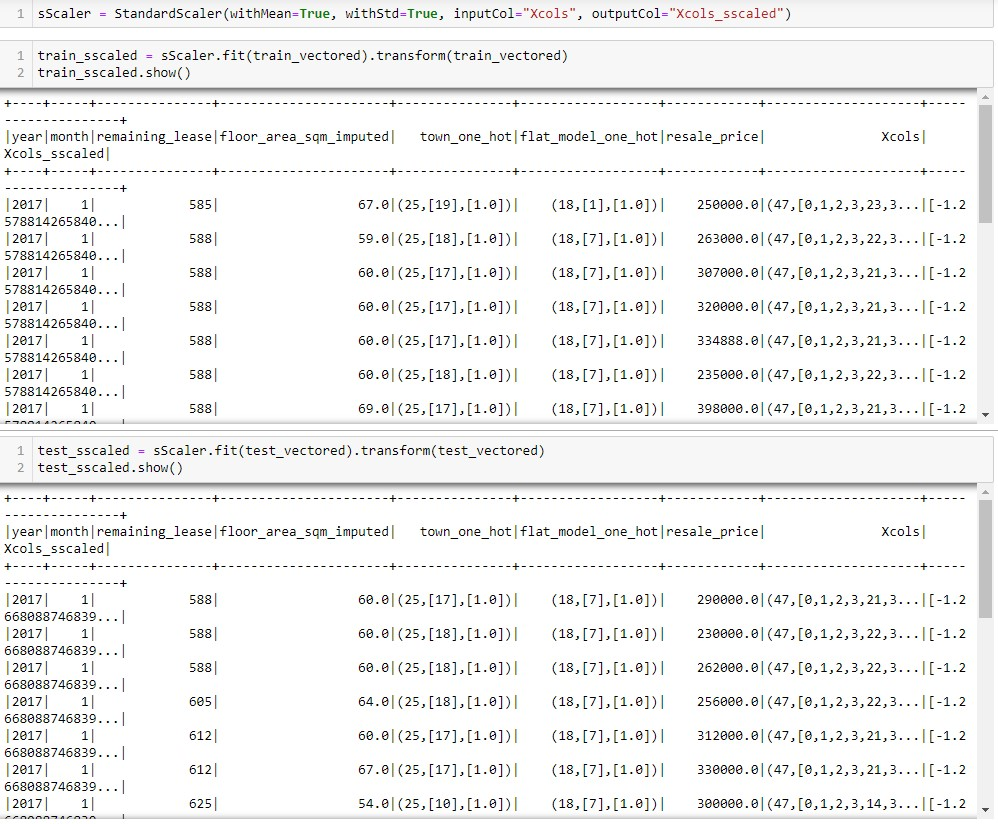

Scaling is done after train test split for both the training and testing data to standardize the independent features in the data in a fixed range. The reason this is done is that features with larger value ranges tend to dominate over features with smaller ranges. For example, the model will perceive 3000m to be more than 4km as 3000 is much larger than 4. Scaling all the variables to a similar level ensures they are treated fairly, with each variable not being more dominant than another.

#### 4. Machine Learning Modelling <a id="part4"></a>
[Back to top](#top)

#### 4.1 Show Count of Rows and Columns <a id="part4.1"></a>
[Back to top](#top)

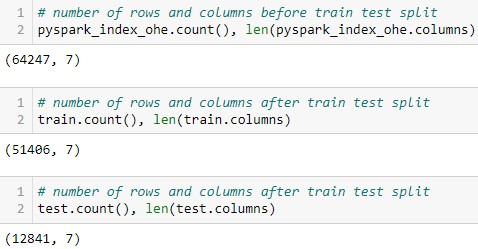

#### 4.2 Sample of 10 Rows before Modelling <a id="part4.2"></a>
[Back to top](#top)

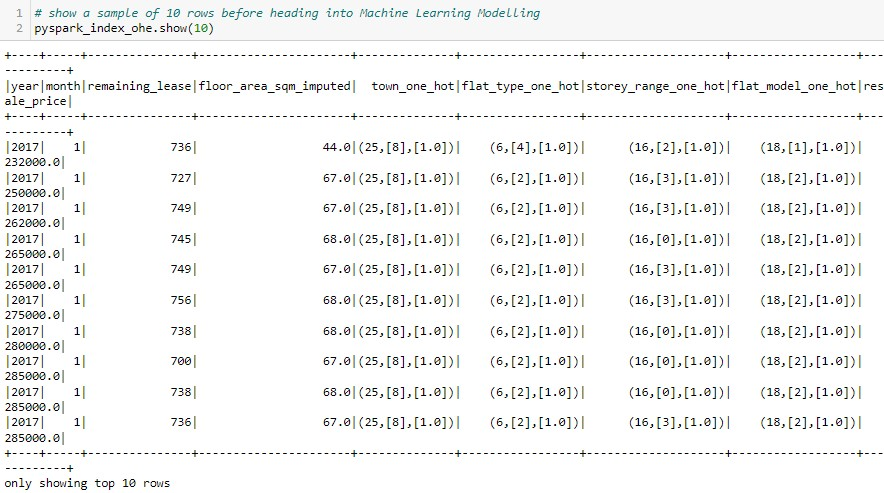

#### 4.3 Build the Predictive Model <a id="part4.3"></a>
[Back to top](#top)

##### Train Test Split

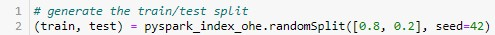

##### Consolidate X Columns

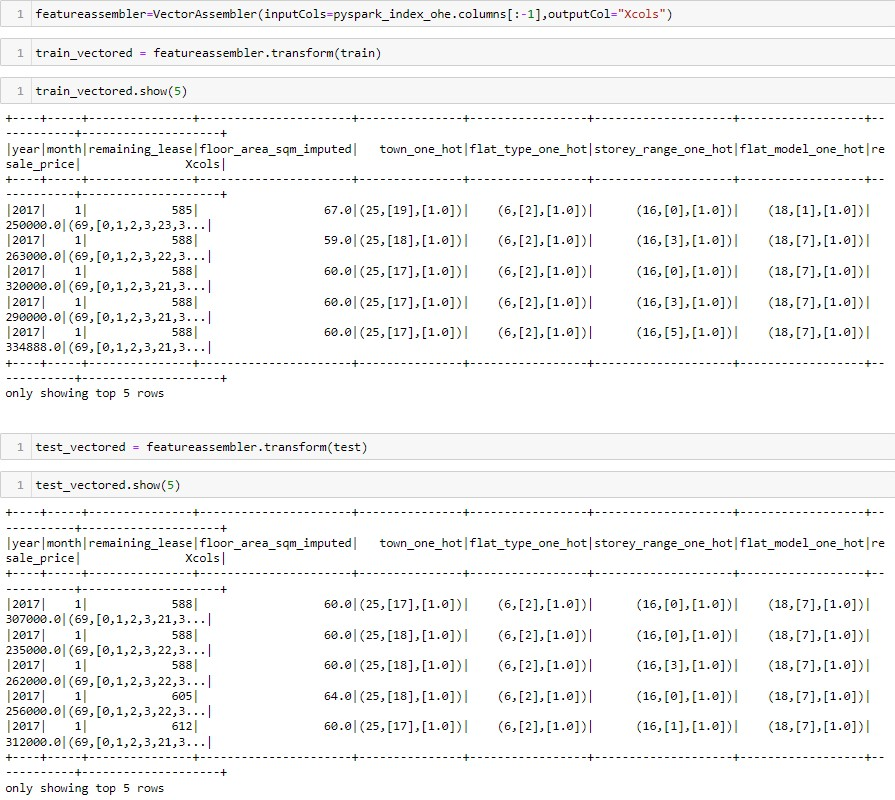

##### Scaling

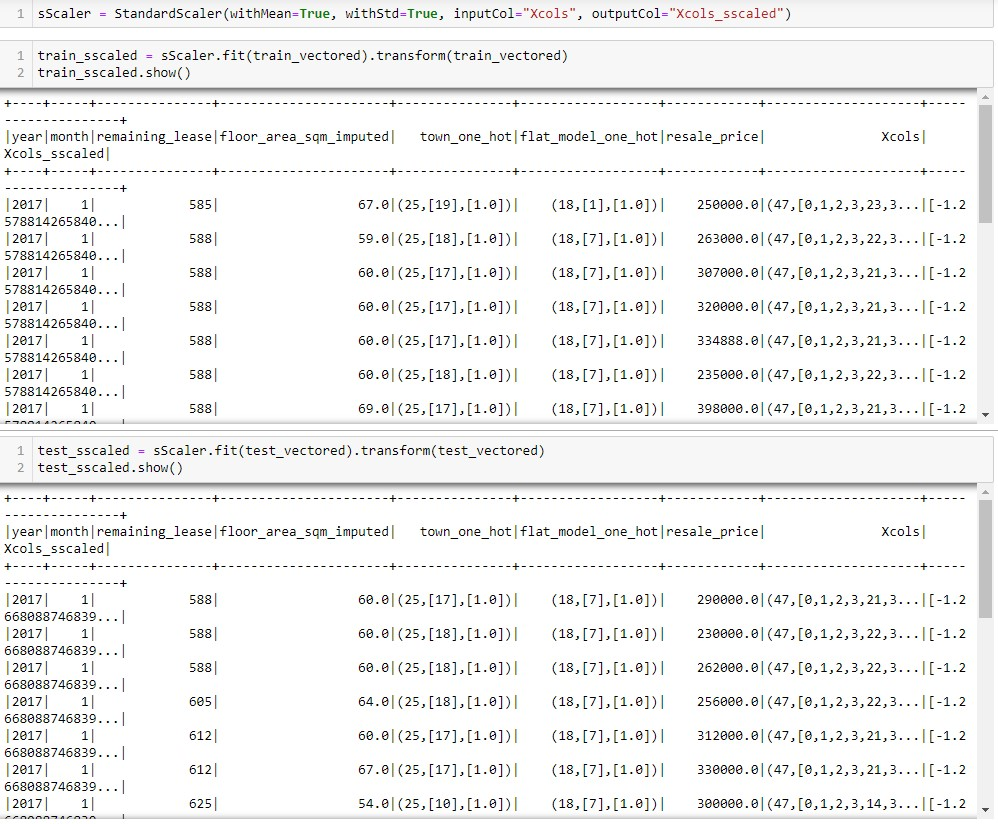

##### Build Model

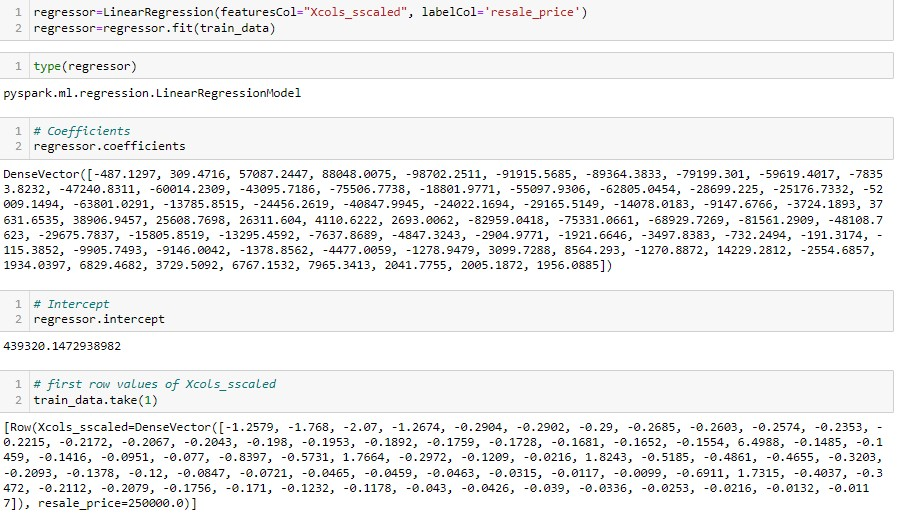

The count of rows and columns shows that there are 64247 rows and 7 columns in total. This means that there is a good amount of data fed into the model. Generally, a rows to columns ratio of about 100 to 1 is recommended. My data meets this condition which means that my predictions are not trivial or realistic. The first 10 rows of the data are shown above to gain a quick insight and observe the change to the data after all the transformations. Consolidating all the values that are needed into a single vector column was done under the Consolidate of X columns to be used for prediction. Scaling was then performed on the consolidated column to standardize the independent features in the data in a fixed range. This ensures that all variables are treated fairly, with each variable not being more dominant than another. The scaled result of the consolidated column is then fed to the machine learning model to predict the resale prices of an HDB flat. The results will be discussed in the next section.

#### 5. Model Evaluation and Selection <a id="part5"></a>
[Back to top](#top)

#### 5.1 Utilize Model Metrics for Evaluation <a id="part5.1"></a>
[Back to top](#top)

##### Final Model

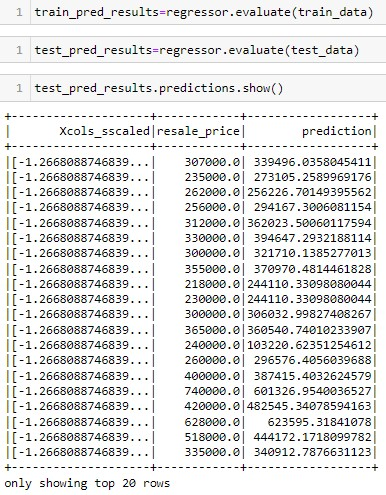

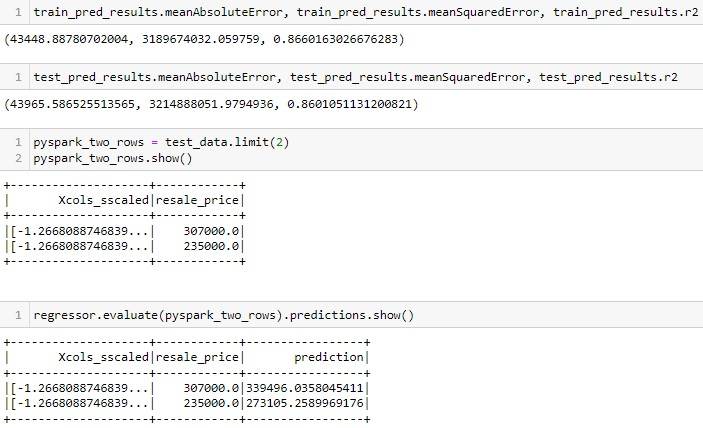

##### 2nd Model

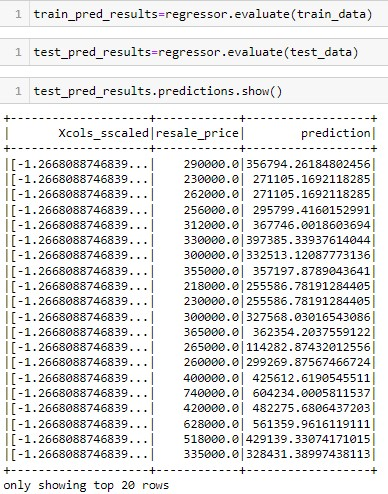

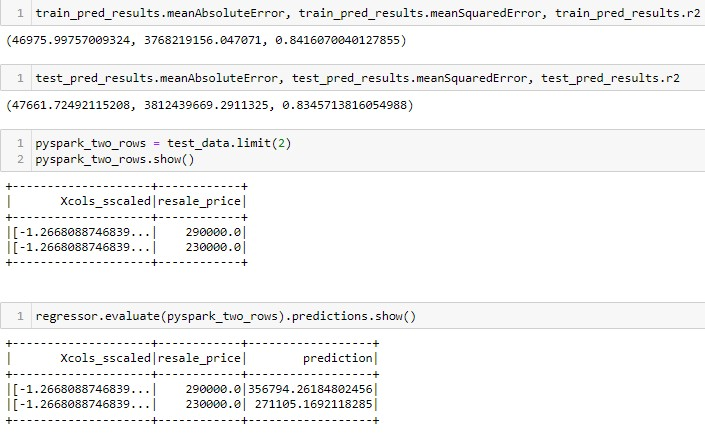

#### 5.2 Compare Models and Decide on Final Model <a id="part5.2"></a>
[Back to top](#top)

In total, 1 model but 2 variations were created. The only difference was the encoding technique used. The first model used purely one hot encoding to encode all the categorical variables. The second model used a mixture of one hot encoding and ordinal encoding. 

Three measurements were used to measure the model's performance. First, the mean absolute error which refers to the magnitude of the difference between the prediction of an observation and the true value of that observation. Second, the mean squared error which measures how close a regression line is to a set of data points. Lastly, the R square value that represents the goodness of fit of a regression model.

The mean absolute error of both the train and test results were lower by around 3000 to 4000 in the first model which means the difference between the prediction and truth value of an observation is smaller, making it more accurate. The mean squared error of both the train and test results were lower by about 600000000 in the first model which means that the data points are closer to the regression line, making it more accurate. The r square value of both the train and test results were higher by about 0.02 to 0.03 for both train and test results which means the fit of the regression model is better, making it more accurate. 

In the end, the first model was chosen as the results of the first model were better than the second model. 

#### 6. Summary and Further Improvements <a id="part6"></a>
[Back to top](#top)

#### 6.1 Summarize your findings <a id="part6.1"></a>
[Back to top](#top)

The first key finding is that I should drop columns that do not impact the target variable. Before dropping redundant columns, I kept all columns in the dataset and did all the transformations on it. The results were really bad. I then slowly removed columns I deemed redundant. This process was very time-consuming which led to the model being overfitted and under fitted. Once, I removed all the columns that did not affect the target variable, the results improved. 

The second key finding is that changing encoding methods do not impact the model's result significantly. Based on the results shown in section 3.1.1, it is clear that changing encoding methods do not impact the mode's results significantly. The factor that affects the result significantly is the data being fed into the model.

#### 6.2 Explain the possible further improvements <a id="part6.2"></a>
[Back to top](#top)

One improvement would be the efficiency of my code. I am sure there is a faster way for some of the manipulation of data that I carried out. For example, when testing out ordinal encoding, I could have used a function as the code was repeated twice for two different columns.

Another improvement would be to have a rationale for everything I do or plan to do as it costs me a lot of time testing with pyspark on redundant things that do not make a difference to the model. Having a rationale would allow me to better explain my decisions and would not have led to all hassle mentioned in the summary of my findings.

### 7. "Unlisted" Youtube Link to Video Presentation <a id="videolink"></a>
[Back to top](#top)

In [64]:
# insert your link in this cell, you are allowed to comment it out
# youtube link: https://youtu.be/02HaAhJSnUY